In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot ROC

In [2]:
from sklearn.metrics import roc_curve
y_train = [1,1,1,0,1,0,1,0,0,0]
y_scores = [0.95,0.91,0.75,0.67,0.61,0.46,0.42,0.25,0.09,0.04]
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

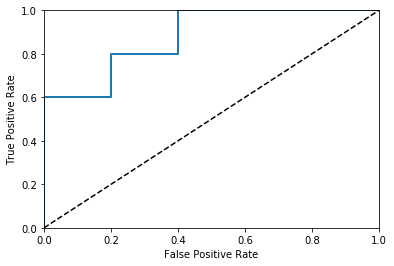

In [3]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

# profit curve 

In [4]:
print(fpr)
print(thresholds)

[0.  0.  0.  0.2 0.2 0.4 0.4 1. ]
[1.95 0.95 0.75 0.67 0.61 0.46 0.42 0.04]


In [5]:
t1 = np.array([1,2,3,4]).reshape(2,2)
t1 * t1
#np.sum(t1 * t1)

array([[ 1,  4],
       [ 9, 16]])

In [6]:
def cal_expected_cost(fp,tp,cost_matrix):
    fn = 1 - tp 
    tn = 1 - fp
    confusion_matrix = np.array([tp, fp, fn, tn]).reshape(2,2)
    exp_v = np.sum(confusion_matrix * cost_matrix)
    return exp_v
    
    
def plt_cost_aware_curve(fpr,tpr,thresholds, cost_matrix, color = 'red', label = None):
    exp_v_list = []
    for i in range(0,len(fpr)):
        exp_v = cal_expected_cost(fpr[i], tpr[i], cost_matrix)
        exp_v_list.append(exp_v)
    plt.xlabel('Thresholds')
    plt.ylabel('Expected Cost')
    plt.plot(thresholds, exp_v_list, linewidth=2, color = color, label = label )

In [7]:
cost_matrix1 = np.array([[0,1],[1,0]])
cost_matrix2 = np.array([[0,2],[1,0]])
cost_matrix3 = np.array([[0,1],[2,0]])

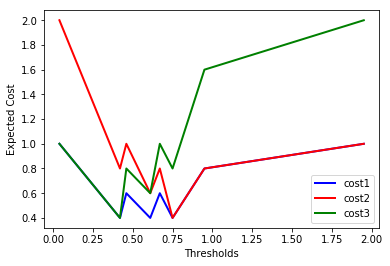

In [8]:
plt_cost_aware_curve(fpr,tpr,thresholds,cost_matrix1,color = 'blue', label = 'cost1')
plt_cost_aware_curve(fpr,tpr,thresholds,cost_matrix2,color = 'red', label = 'cost2')
plt_cost_aware_curve(fpr,tpr,thresholds,cost_matrix3,color = 'green', label = 'cost3')
plt.legend()
plt.show()